<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
+ RowNumber — индекс строки в данных
+ CustomerId — уникальный идентификатор клиента
+ Surname — фамилия
+ CreditScore — кредитный рейтинг
+ Geography — страна проживания
+ Gender — пол
+ Age — возраст
+ Tenure — сколько лет человек является клиентом банка
+ Balance — баланс на счёте
+ NumOfProducts — количество продуктов банка, используемых клиентом
+ HasCrCard — наличие кредитной карты
+ IsActiveMember — активность клиента
+ EstimatedSalary — предполагаемая зарплата

Целевой признак
+ Exited — факт ухода клиента

## Подготовка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv('datasets/Churn.csv')
display(df.head())
print(df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [5]:
#Определим, какие признаки категориальные, а какие количественные
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categories = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

In [6]:
#Уберем ненужные колонки
df = df.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

In [7]:
#Как видно из вызова info в колонке Tenure есть пропуски.
#Поскольку значения распределены примерно  равномерно то лучше заполнить рандомными чем медианой
print(df['Tenure'].value_counts())
df['Tenure'] = df['Tenure'].apply(lambda x: random.choice(df['Tenure'].dropna().values))

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


In [8]:
#отделяем 40% выборки и делим их пополам, получая валидационную и тестовую.
df_train, data_new = train_test_split(df, test_size=0.40, random_state=12345)
df_valid, df_test = train_test_split(data_new, test_size=0.50, random_state=12345)

In [9]:
#обучающая выборка и OHE
features_train = pd.get_dummies(df_train[categories], drop_first=True)
target_train = df_train['Exited']

#валидационная выборка и OHE
features_valid = pd.get_dummies(df_valid[categories], drop_first=True)
target_valid = df_valid['Exited']

#тестовая выборка и OHE
features_test = pd.get_dummies(df_test[categories], drop_first=True)
target_test = df_test['Exited']

#масштабирование
scaler = StandardScaler()
scaler.fit(df_train[numeric])
features_train[numeric] = scaler.transform(df_train[numeric])
features_valid[numeric] = scaler.transform(df_valid[numeric])
features_test[numeric] = scaler.transform(df_test[numeric])

<b>Итог:</b>
Данные подготовлены, три лишние колонки удалены, пропуски в колонке Tenure (сколько лет человек является клиентом банка) заполнены нулями. Категориальные преобразованы по технике OHE, количественные приведены к одному масштабу.

## Исследование задачи

In [10]:
def score_model(model, features, target):
    '''Вывод значений F1 и AUC-ROC'''
    predictions = model.predict(features)
    print('F1:', f1_score(target, predictions))
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    print('AUC-ROC:', roc_auc_score(target, probabilities_one))

In [11]:
exited_values = df['Exited'].value_counts(normalize=True)

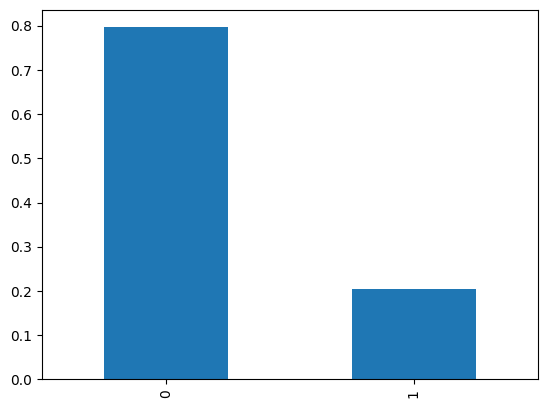

In [12]:
exited_values.plot(kind='bar')
None

Как видно из графика значений с 0 в 4 раза больше чем с 1

In [13]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.5006016847172082
AUC-ROC: 0.6840124244642176


In [14]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.3276450511945393
AUC-ROC: 0.7566810227499561


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=12345)
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.5844748858447488
AUC-ROC: 0.844458289730763


<b>Вывод:</b>
Существует перекос в сторону "не ушел", значений с нулем почти 8т. а с единицей 2т.
Можно либо выбросить 3/4 нулей, либо увеличить количество единиц в 4 раза.

На текущих данных лучше всего показывает себя RandomForestClassifier

## Борьба с дисбалансом

In [16]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.4875536480686695
AUC-ROC: 0.7626150049298628


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.5617283950617283
AUC-ROC: 0.8444189718060234


In [18]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
score_model(model, features_valid, target_valid)

F1: 0.506024096385542
AUC-ROC: 0.6873529358391958


In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled



def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [20]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Попробую для всех типов моделей передать им увеличенные и уменьшенные выборки, чтобы определить  какой способ борьбы с дисбалансом в данном случае лучше и определить гиперпараметры.

In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
score_model(model, features_valid, target_valid)

F1: 0.4896907216494845
AUC-ROC: 0.7630021352657589


In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
score_model(model, features_valid, target_valid)

F1: 0.4883920894239037
AUC-ROC: 0.7625514913591299


In [23]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
score_model(model, features_valid, target_valid)

F1: 0.4949999999999999
AUC-ROC: 0.7019761793865192


In [24]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
score_model(model, features_valid, target_valid)

F1: 0.5108958837772397
AUC-ROC: 0.6901293862169503


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=12345)
model.fit(features_downsampled, target_downsampled)
score_model(model, features_valid, target_valid)

F1: 0.6001863932898416
AUC-ROC: 0.8480195863754317


In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=12345)
model.fit(features_upsampled, target_upsampled)
score_model(model, features_valid, target_valid)

F1: 0.6160000000000001
AUC-ROC: 0.8441664297509663


In [32]:
best_model_f = None
best_result_f = 0
best_depth_f = 0
best_est_f = 0
for est in range(50, 150, 10):
    for depth in range(6, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result_f:
            best_model_f = model
            best_result_f = result
            best_depth_f = depth
            best_est_f = est

print('Наилучший показатель:', best_result_f, 'при глубине', best_depth_f, 'и числе деревьев', best_est_f)
probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one))

Наилучший показатель: 0.6112702960840496 при глубине 8 и числе деревьев 140
AUC-ROC: 0.8487167234256197


In [34]:
best_model_f = None
best_result_f = 0
best_depth_f = 0
best_est_f = 0
for est in range(50, 150, 10):
    for depth in range(6, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result_f:
            best_model_f = model
            best_result_f = result
            best_depth_f = depth
            best_est_f = est

print('Наилучший результат:', best_result_f, 'при глубине', best_depth_f, 'и числе деревьев', best_est_f)
probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one))

Наилучший результат: 0.6398104265402843 при глубине 12 и числе деревьев 140
AUC-ROC: 0.8493533713608236


<b>Вывод:</b>
Наилучший результат получается, если произвести апсэмплинг, увеличив количество записей с целевым параметром "1", продублировав уже имеющиеся данные.
Если передавать уменьшенные выборки то на всех моделях результат хуже. 
Экспериментальным путем на основе F1-метрики были определены гиперпараметры модели.

## Тестирование модели

In [35]:
predictions = best_model_f.predict(features_test)
print('F1:', f1_score(target_test, predictions))
probabilities_test = best_model_f.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_test))

F1: 0.6030267753201397
AUC-ROC: 0.8561097694248437


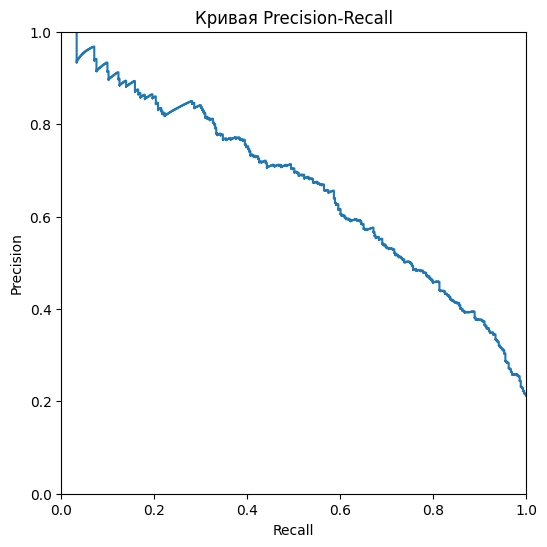

In [36]:
#Чтобы показать качество модели и, как с изменением порога будут меняться параметры 
# точности и полноты, построим график
probabilities_valid = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

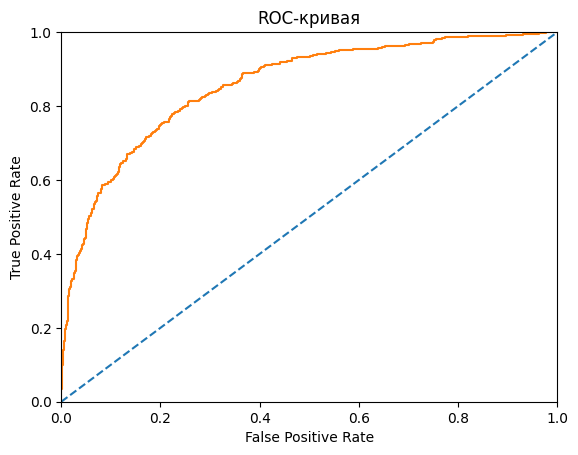

In [37]:
#Чтобы наглядно показать, как сильно наша модель отличается от случайной, построим ROC-кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show() 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*